
## Regression Analysis (Chapter 6)

This lab session focuses on a regression analysis and its applications. We will excercise some of the python tools for building and evaluating the regression models. 

Specifically we will look into:
* Simple Linear Regression 
* Multiple Linear Regression
* Polynomial Regression 
* Logistic Regression
* Pickling 

Before, getting into lab excercise, we will look into the basics and run codes for regression models from textbook

For future reference: 

* http://scikit-learn.org/stable/modules/linear_model.html

## Regression Models
* ** *Regression models are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science as well as applications in industries. They are used to predict the trends, forecast the future, relationship between the variables* ** (source from Python Machine Learning by Sebastian Raschka) 
* The main concepts while building the regession models are:
        - Exploring and visualizing the dataset (EDA)
        - Selection of regression models 
        - Training regression model 
        - Evaluating the model built 
        - Fitting these models to dataset under study

## Simple Linear Regression

The simplest relation that can exist in the model is the **linear model**, where the response $\textbf{y}$ (response or target variable) depends linearly from the covariates $\textbf{x}_i$ (feature).

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter 

$a_0$ is called the constant term or the *intercept*.

$a_1$ is called the coefficient of the explanatory variable *coeff*.

In [1]:
! pip install seaborn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")
plt.rc('figure', figsize = (10, 5))

In order to observe the linear regression using the normal distributed dataset. 

In [3]:
X1 = np.random.randn(300, 2)  # Random points sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A) # np.dot() returns the dot product of two array

In [4]:
A


array([[0.6, 0.4],
       [0.4, 0.6]])

* Visualizing this dataset

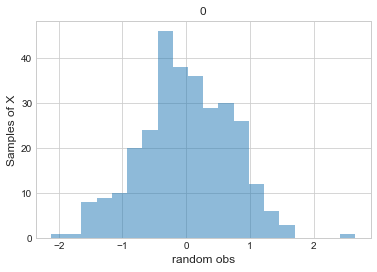

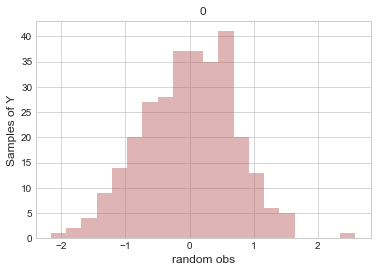

In [5]:
import matplotlib.pyplot as plt
pd.DataFrame(X2[:, 0]).hist(histtype='stepfilled', alpha=.5, bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of X',fontsize=12)
pd.DataFrame(X2[:,1]).hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of Y',fontsize=12)
plt.show()

## Scatter plot of the observation

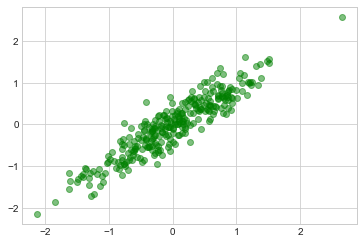

In [6]:
plt.plot(X2[:, 0], X2[:, 1],"o", alpha = 0.5, c='g') # alpha, blending value, between 0 (transparent) and 1 (opaque).

* The redline indicates the regression model 

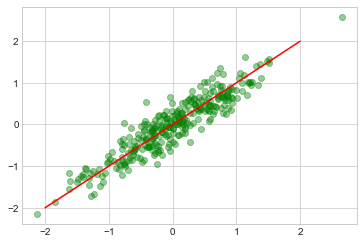

In [7]:
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.4, c='g');
plt.plot(np.arange(-2,3), model, 'r');
plt.show()
# The red line gives the predicted values of this model

* There could be multiple regression models (in this case, multiple fitting lines), similar to the classifiers, we need to gauage and evaluate. 
* The best fitting line is known as regression line 
* Another important terminalogy is the **residue** or **offsets** which is nothing but an errors of the prediction with the real parameters.

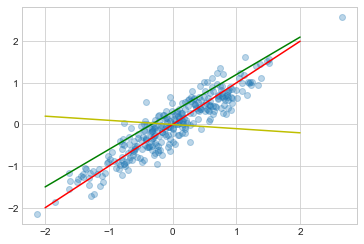

In [8]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0.0 + 1.0*x for x in np.arange(-2,3)]
model2 = [0.3 + 0.9*x for x in np.arange(-2,3)]
model3 = [0.0 - 0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')

### Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


## Preprocessing

### We will run an example case from text book and analyze the result


* Loading Sea Ice Data and climate change dataset
* Dataset: **SeaIce.txt **
* Preprocessing and Data Cleaning is necessary
* Processed data is to be stored as a pickle (*.pkl)

### Dataset loading

In [9]:
import pandas as pd
ice = pd.read_csv('SeaIce.txt', delim_whitespace = True)
print ('shape:', ice.shape)
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [10]:
ice.mean() 
# Observation: a negative mean?!!

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

Text(0,0.5,'Extent')

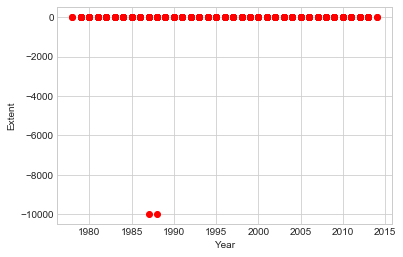

In [11]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

Observation from above: 
    
    - We see that there is an anamoly in the dataset
    - "-9999" does not seems to be a data, this value has potential to impact the regression line
    - One has to be very careful in analyzing this type of outliers. This is where, EDA (Exploratory Data Analysis) comes        into picture
    - Data Cleaning and Pre-processing is very much essential in this case.

### Data Cleaning 

In [12]:
print ('Different values in data_type field:\n', np.unique(ice.data_type.values) , '\n')  # there is a -9999 value!)
# Let's see what type of data we have more than Goddard and NRTSI-G 
print (ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

Different values in data_type field:
 ['-9999' 'Goddard' 'NRTSI-G'] 

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


Text(0,0.5,'Extent')

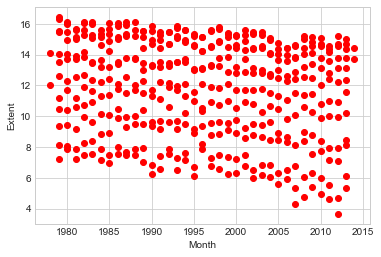

In [13]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
print ('shape:', ice2.shape)
# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

## PICKLE 

* Standard library module 
* pickling/unpickling (serialization/de-serialization) - converts the python modules into byte stream and to back.
* Very efficient 

Please read through the below link: 

https://docs.python.org/3/library/pickle.html#module-pickle

In [14]:
import pickle

#### Creating a pickle and sending in the dataframe of ice

In [15]:
pickle_out = open('data.pkl', 'wb')
# pickle.dump(ice, pickle_out)
# Pickle the 'data' dictionary using the highest protocol available.
pickle.dump(ice2, pickle_out, pickle.HIGHEST_PROTOCOL)
pickle_out.close()

#### Loading in the pickle

In [16]:
pickle_in = open("data.pkl", "rb")
SeaIce = pickle.load(pickle_in)

In [17]:
print (type(SeaIce))

<class 'pandas.core.frame.DataFrame'>


Text(0,0.5,'Extent')

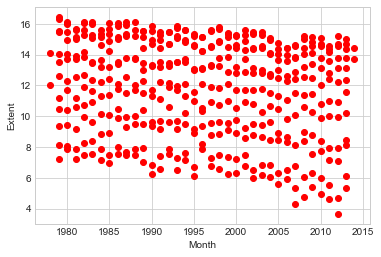

In [18]:
x = SeaIce.year
y = SeaIce.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

### Back to Linear Regression Model

https://seaborn.pydata.org/generated/seaborn.lmplot.html

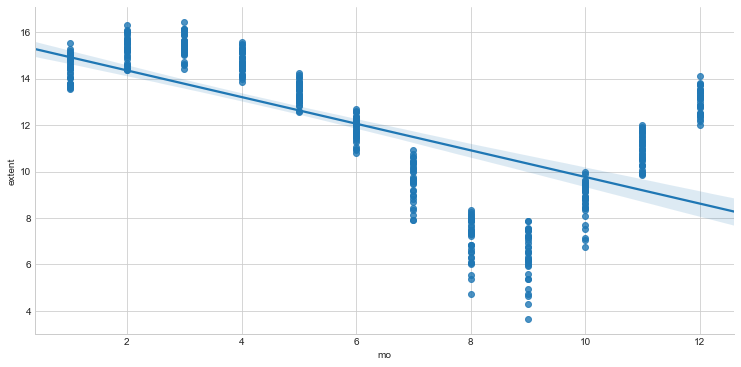

In [19]:
sns.lmplot("mo", "extent", SeaIce, size = 5.2, aspect = 2);

In [20]:
# Compute the mean for each month.
grouped = SeaIce.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print ('Means:', month_means)
print ('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


C:\Users\nkattapr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


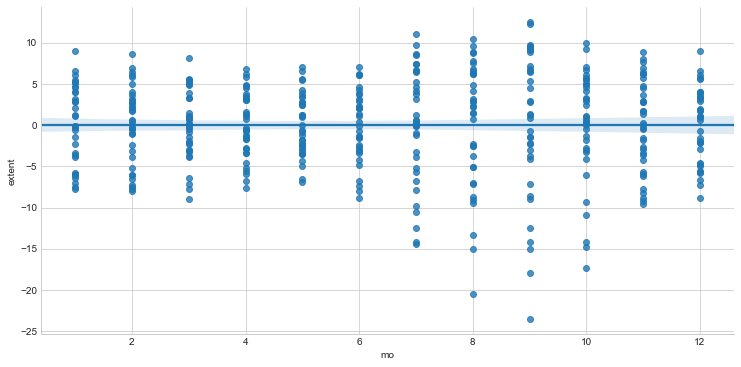

In [21]:
# Data normalization
for i in range(12):
    SeaIce.extent[SeaIce.mo == i+1] = 100*(SeaIce.extent[SeaIce.mo == i+1] - month_means[i+1])/month_means.mean()
    
sns.lmplot("mo", "extent", SeaIce, size = 5.2, aspect = 2);


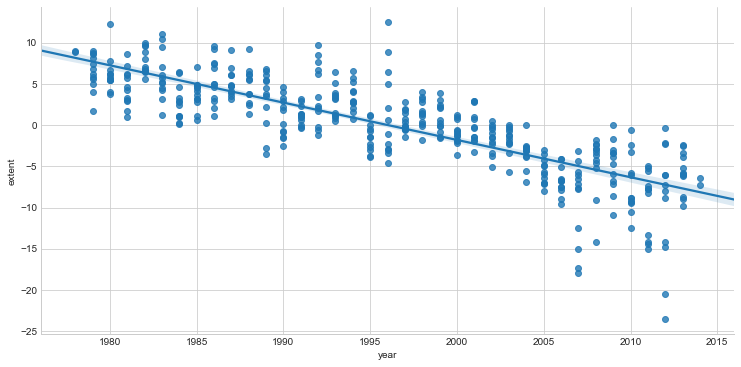

In [22]:
sns.lmplot("year", "extent", SeaIce,size = 5.2, aspect = 2);
# plt.savefig("files/ch06//IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

### For each Month

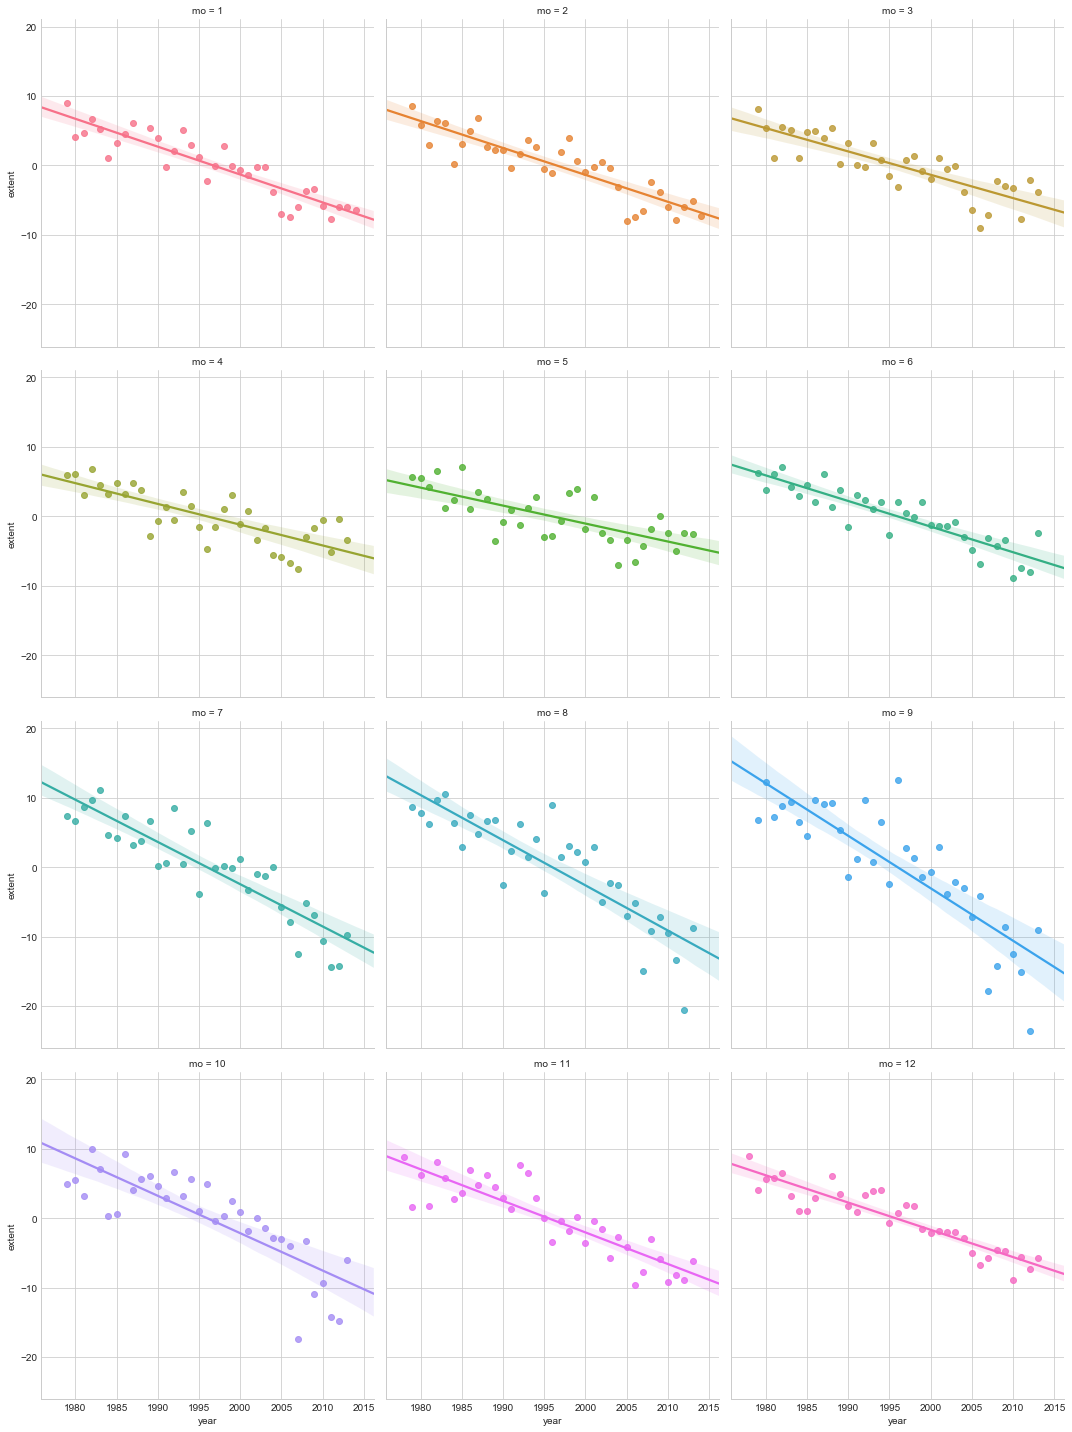

In [23]:
sns.lmplot(x="year", y="extent", hue="mo", col="mo", data=SeaIce, col_wrap=3) 

We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$. 

#### Lets use the Linear Regression models from sklearn linear models 

In [24]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = SeaIce[['year']]
y = SeaIce[['extent']]

est.fit(x, y)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


** We can evaluate the model fitting by computing**

    i. Mean Squared Error ($MSE$) 

    ii. Coefficient of determination ($R^2$) 

The coefficient $R^2$ is defined as 

$(1 - \textbf{u}/\textbf{v})$,

where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.

The best possible score for $R^2$ is 1.0: lower values are worse.

These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

Text(0,0.5,'extent (All months)')

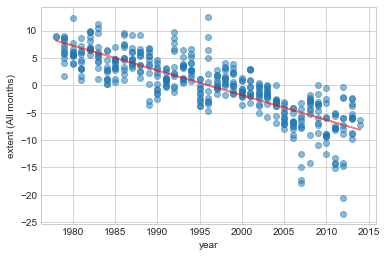

In [25]:
from sklearn import metrics

# Analysis for all months together.
x = SeaIce[['year']]
y = SeaIce[['extent']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')

# plt.savefig("files/ch06/IceExtentLinearRegressionAllMonthsByYearPrediction.png", dpi = 300, bbox_inches = 'tight')

## Excercise: From the current understanding, plot a residuals for the above plot

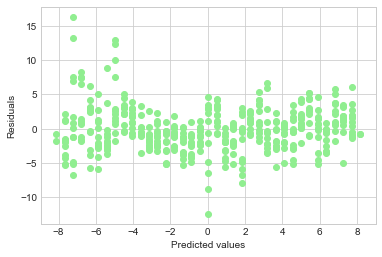

In [26]:
plt.scatter(y_hat, y_hat-y, c='lightgreen', label='Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

## Another way to evaluate the performance of linear regression is to use MSE and R2 as a measure

* From Sklearn metrics import MSE and R-square methods and apply to the problem

In [27]:
from sklearn import metrics

print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))
print ("var:", y.var())

MSE: 10.539131639803518
R^2: 0.5067870382100239
var: extent    31.98324
dtype: float64


# Multiple Linear & Polynomial Regression 

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

## Boston data set

**Attributes**
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [28]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print ('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [29]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target

* Plot of price vs Average no of rooms per dwelling
* use lmplot (price and RM)

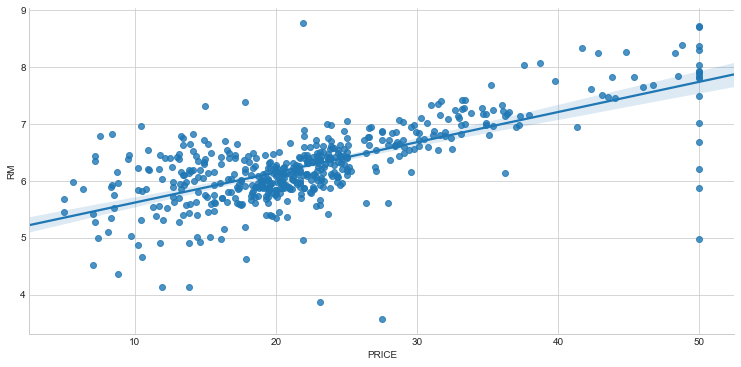

In [30]:
# Visualization of the relations between price and RM
sns.lmplot("PRICE","RM", df_boston, size = 5.2,aspect=2)

* Plot of price vs  % lower status of the population
* Use lmplot (Price and Lstat)

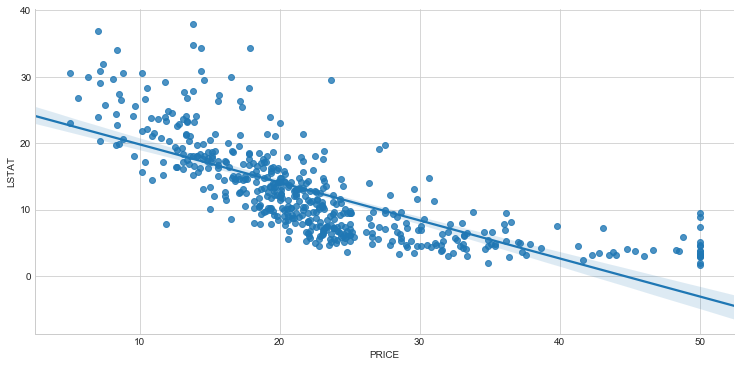

In [31]:
# Visualization of the relations between price and LSTAT
sns.lmplot("PRICE", "LSTAT", df_boston, size = 5.2, aspect = 2)
# plt.savefig("files/ch06/lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

In [32]:
from sklearn import metrics
x = df_boston[['PRICE']]
y = df_boston[['LSTAT']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

print ("MSE:", metrics.mean_squared_error(y_hat, y))
print ("R^2:", metrics.r2_score(y_hat, y))

MSE: 23.200208918044186
R^2: 0.16225892846202383


** We see that the regression line is poorly fit and which causes large MSE and low R2 score **

** We can now look into multiple linear regression and polynomial linear regression **

### Excercise: 

Apply different order to the linear regression and observe the plot.
* Let interested variable be LSTAT and price.
* Multiple linear regression can be realised using the order in lmplot
* Build the multiple linear regression 
* Try changing the order to 2, 3, 5 and 10

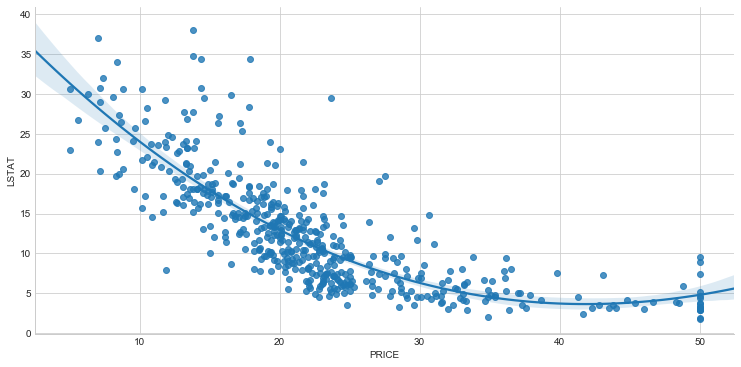

In [33]:
sns.lmplot("PRICE", "LSTAT", df_boston, size = 5.2, aspect = 2, order = 3)

Applying linear regression and finding the relationship for each variable is a time-consuming. There are various functions that help to analyze the complete dataset and its relation. A few of them are
* Correlation (corr) - Used to compute the Correlation between variable. Available in pandas 'corr'. Various correlation methods can be applied - pearson, spearman and kendall. - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
* Heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Scatterplot matrix - https://seaborn.pydata.org/examples/scatterplot_matrix.html

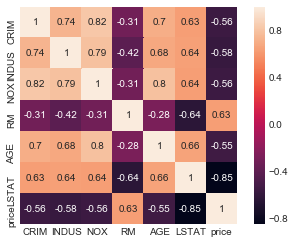

In [34]:
# Heatmap 
indexes = [0, 2, 4, 5, 6, 12] #To plot just some of the variables
df2 = pd.DataFrame(boston.data[:, indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr(method='spearman')

# Draw the heatmap using seaborn
sns.heatmap(corrmat, square = True, annot=True)

#### As we can see the LSTAT and Price has a largest correlation of -0.85 and from Scatter plot, it is evident that the data is nonlinear. Some more EDA are Scatter Matrix Plot 

C:\Users\nkattapr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002127C9AEDD8>,
      dtype=object)

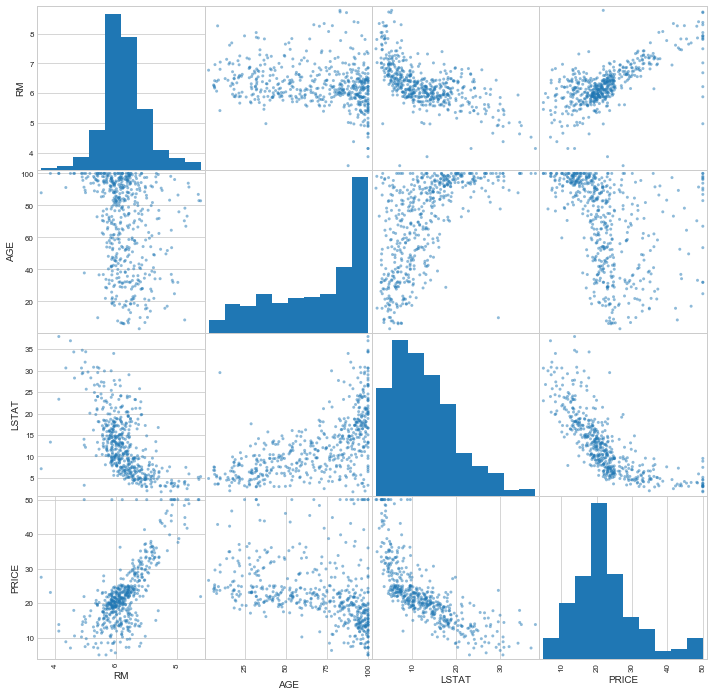

In [35]:
indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
pd.scatter_matrix(df2, figsize = (12.0, 12.0))  

### Using Seaborn, we can also fit linear regression models to the scatter matrix plots

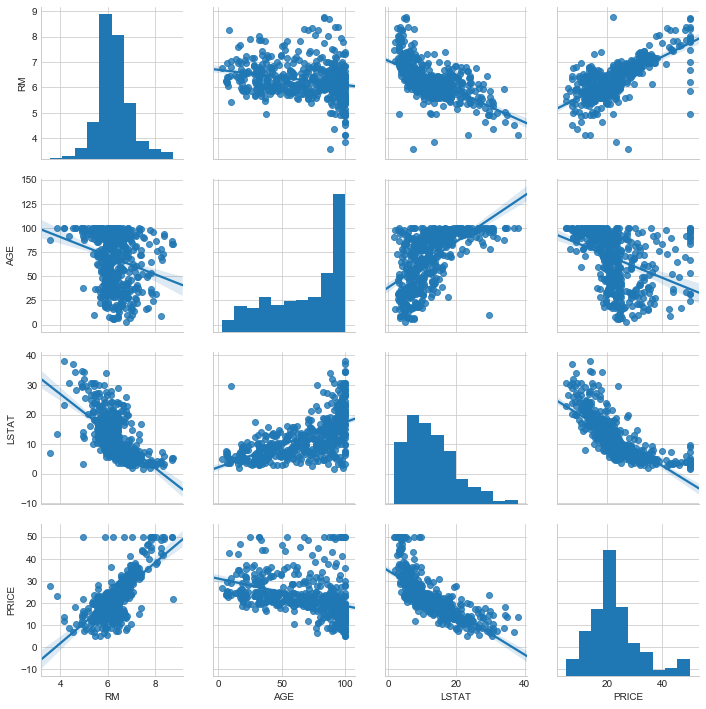

In [36]:
sns.pairplot(df2, kind="reg", aspect=1.0)

## Prediction aspects

### Excercise:
        - Split the boston dataset into test and training (50:50)
        - Apply Linear Regression
        - Find the coefficient and intercepts of the predicted model
        - Compute testing and training scores 
        - Find MSE
        - use variables by name - X_train, X_test, y_train, y_test, X_boston,y_boston, 
        
        
* For MSE, refer to http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* Applying Linear Regression and finding coefficient, look into : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [37]:
from sklearn import linear_model
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target

# Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.5)
print ('Training and testing set sizes', X_train.shape, X_test.shape)


Training and testing set sizes (253, 13) (253, 13)


In [38]:
# fitting linear regression
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print ('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_ )

Coeff and intercept: [-1.39708846e-01  5.81718871e-02 -1.89368657e-02  1.00100253e+00
 -2.36209515e+01  3.09934977e+00 -8.53900730e-03 -2.16015128e+00
  3.08914082e-01 -1.03046785e-02 -1.15734061e+00  9.12903311e-03
 -5.27835592e-01] 50.984431970435566


In [39]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr_boston.score(X_train, y_train))
print ('Testing Score:', regr_boston.score(X_test, y_test))
print ('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

Training Score: 0.7406913723735389
Testing Score: 0.7165798587962109
Training MSE:  23.777458573313424
Testing MSE:  21.83444166882492


## Run the below code to visualize the residuals of linear regression model
### Is this the best fit?

C:\Users\nkattapr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


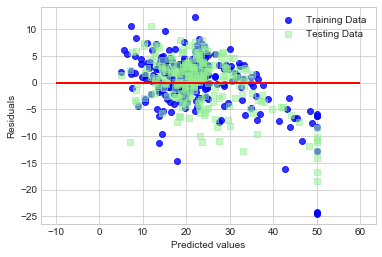

In [40]:
plt.scatter(y_train, (regr_boston.predict(X_train)-y_train), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(y_test, (regr_boston.predict(X_test)-y_test), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()

## Applying the polynomial regression for training data and observe the performance index

In [41]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
Xtrain_quad = quadratic.fit_transform(X_train)
regr_boston= regr_boston.fit(Xtrain_quad, y_train)
ypredict_quad = regr_boston.predict(Xtrain_quad);
print('R2 score:', metrics.r2_score(y_train, ypredict_quad))
print('MSE:', metrics.mean_squared_error(y_train, ypredict_quad))

R2 score: 0.9390471042306294
MSE: 5.589111968026959


In [42]:
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(degree=3)
Xtrain_cubic = cubic.fit_transform(X_train)
regr_boston= regr_boston.fit(Xtrain_cubic, y_train)
ypredict_cubic = regr_boston.predict(Xtrain_cubic);
print('R2 score:', metrics.r2_score(y_train, ypredict_cubic))
print('MSE:', metrics.mean_squared_error(y_train, ypredict_cubic))

R2 score: 1.0
MSE: 5.506984746884289e-20


## Logistic Regresion (Scikit-learn)

By definition - **Logistic regression** is a type of probabilistic statistical classification model and is mainly used to predict a binary response from a binary predictor. 

* Also known as Logit Regression 
* It is used to estimate the probability that an instance belong to particular class or group
* Binary classifiers 
* Typical instance used is - **win/loss, spam/not spam, positive/negative sentiment, 0/1 **
* Used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 


The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

** Y_p =  0 if p < 0.5 **

** Y_p =  1 if p>= 0.5 **


Ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

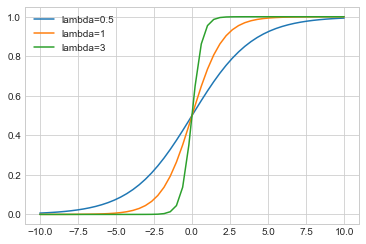

In [43]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10, 10) # 50 points equally spaced from -10 to 10
t = logist(x, 0.5)
y = logist(x, 1)
z = logist(x, 3)
plt.plot(x, t, label = 'lambda=0.5')
plt.plot(x, y, label = 'lambda=1')
plt.plot(x, z, label = 'lambda=3')
plt.legend(loc = 'upper left')
#plt.savefig("files/ch06/LogisticRegression.png", dpi = 300, bbox_inches = 'tight')

In [44]:
# Season 2012/2013
file = 'SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
data_football = pd.read_csv(file)
s = data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [45]:
# Visualization with scatter the number of goals
# plt.scatter(s.FTHG, s.FTAG, s = 100, alpha = 0.05) 
# # s, size of the points, alpha, blending value, between 0 (transparent) and 1 (opaque).
# plt.xlabel('Home team goals (FTHG)')
# plt.ylabel('Away team goals (FTAG)')
# Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
s['W'] = s.apply(my_f1, axis = 1)
s['L'] = s.apply(my_f2, axis = 1)

C:\Users\nkattapr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nkattapr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [46]:
# Create the data and target
import numpy as np
x1 = s['W'].values 
y1 = np.ones(len(x1), dtype = np.int)
x2 = s['L'].values 
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])


def lr_model(x):
    return 1 / (1 + np.exp(-x))


Text(0,0.5,'Victory (1) or Defeat (0)')

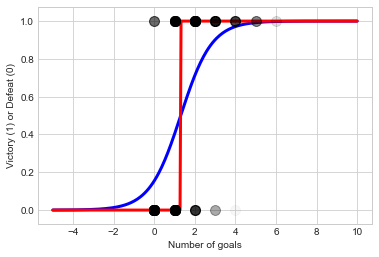

In [47]:
# Fitting of a Logistic Regression and prediction using the model:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)

X_test = np.linspace(-5, 10, 300)

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)
plt.xlabel('Number of goals')
plt.ylabel('Victory (1) or Defeat (0)')


### We can build a classifier using the logistic regression 
* Detect the species type based on petal width
* Import logistic regression from sklearn linear model


In [48]:
# import iris dataset to iris
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [49]:
# Use only the petal width as feature and assign to X 
X = iris["data"][:, 3:] # petal width

# lets train the model to identify if target model is of Virginica species or not (Remember log reg is 
# used as a binary classifier) (also convert to integer)
y = (iris["target"] == 2).astype(np.int)

In [50]:
# import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# assign the logistic regression to the below variable
log_reg = LogisticRegression()

# training the model
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
new = log_reg.predict_proba(1.6)
new

array([[0.50832222, 0.49167778]])

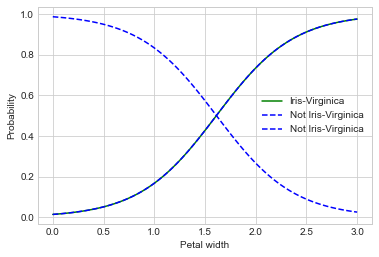

In [52]:
X_new = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
# y_proba = log_reg.predict(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba, "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.show()


[0 0 0 0 0 0 1 1 1 1 1 1]


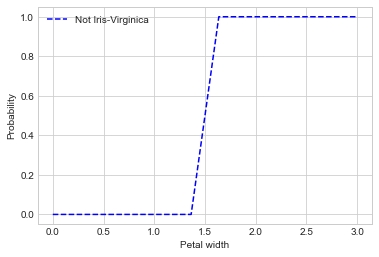

In [53]:
X_new = np.linspace(0, 3, 12).reshape(-1, 1)
y_proba = log_reg.predict(X_new)
print(y_proba)
# plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba, "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.show()

* Petal width above 2 cm has higher probability of being iris-virginica 
* Similarly if below 1 cm, there is a higher probability of not-virginica
